#  **EDA on Attrition Data**
<img src = 'https://github.com/arulpanditaa/EDA/blob/main/DTU.jpg?raw=true' width="250" height="350" align='right'><br/>

<img src="https://encrypted-tbn0.gstatic.com/images?q=tbn:ANd9GcRVUsJgNzxWuMULW9LPodCA1jYgg9dghoN64Mqyx_F1CfNzv4WYuE6VPAnkdIGurkcQeWU&usqp=CAU" align='left' width="750" height="350"><br/>





##     Table of Contents


1. [Problem Statement](#section1)<br>


## 1. Problem Statement <br>

**Employee attrition** is a major cost to an organization and predicting such attritions is the most important requirement of the Human Resources department in many organizations. In this problem, we are tasked to predict the attrition of employees of an organization.

Your client is the HR Department at a software company.

a. They want to try a new initiative to retain employees.<br>
b. The idea is to use data to predict whether an employee is likely to leave.<br>

Once these employees are identified, HR can be more proactive in reaching out to them before it's too late.


## 1. Import Packages <br>

In [225]:
import numpy as np                     

import pandas as pd
pd.set_option('mode.chained_assignment', None)      # To suppress pandas warnings.
pd.set_option('display.max_colwidth', None)           # To display all the data in each column
pd.options.display.max_columns = 50                 # To display every column of the dataset in head()

import warnings
warnings.filterwarnings('ignore')                   # To suppress all the warnings in the notebook.
print('done')

done


In [226]:
from pathlib import Path

import numpy as np
import pandas as pd
import requests
import pandas_profiling


In [227]:
import matplotlib.pyplot as plt
%matplotlib inline

import seaborn as sns
sns.set(style='whitegrid', font_scale=1.3, color_codes=True)      # To apply seaborn styles to the plots.
print('done')

done


In [228]:
# Install and update plotly using this command to the latest version (higher than version 4.0.0)

!pip install plotly --upgrade
print('done')

done


In [229]:
#!pip install plotly
!pip install chart-studio

In [230]:
# Making plotly specific imports
# These imports are necessary to use plotly offline without signing in to their website.

from plotly.offline import init_notebook_mode,iplot
import plotly.graph_objs as go
import chart_studio.plotly as py
from plotly import tools
init_notebook_mode(connected=True)

In [231]:
! pip install https://github.com/pandas-profiling/pandas-profiling/archive/master.zip
#! pip install https://github.com/pandas-profiling/pandas-profiling/archive/master.zip 

  Using cached https://github.com/pandas-profiling/pandas-profiling/archive/master.zip


In [232]:
import sys

!{sys.executable} -m pip install -U pandas-profiling[notebook]
!jupyter nbextension enable --py widgetsnbextension

Enabling notebook extension jupyter-js-widgets/extension...
Paths used for configuration of notebook: 
    	/root/.jupyter/nbconfig/notebook.json
      - Validating: OK
Paths used for configuration of notebook: 
    	/root/.jupyter/nbconfig/notebook.json


In [233]:
from pandas_profiling.utils.cache import cache_file

#from pandas_profiling.utils import cache_file
print('done')

done


<a id=section3></a>
## 3. Loading Data

In [234]:
from google.colab import files
uploaded_dept = files.upload()

Saving Department-FIle.xlsx to Department-FIle (1).xlsx


In [235]:
import io
df_dept = pd.read_excel(io.BytesIO(uploaded_dept['Department-FIle.xlsx']))
# Dataset is now stored in a Pandas Dataframe

In [236]:
#df.head(2)
#df.tail(2)
df_dept.shape

(11, 4)

In [239]:
df_dept.head(2)

,dept_id,dept_name,dept_head
0,D00-IT,IT,Henry Adey
1,D00-SS,Sales,Edward J Bayley


In [238]:
df_dept.drop(['Unnamed: 0'], 1, inplace=True)

In [240]:
from google.colab import files
uploaded_emp = files.upload()

Saving employee-details.xlsx to employee-details (1).xlsx


In [241]:
import io
df_emp = pd.read_excel(io.BytesIO(uploaded_emp['employee-details.xlsx']))
# Dataset is now stored in a Pandas Dataframe

In [242]:
df_emp.drop(['Unnamed: 0'], 1, inplace=True)

In [243]:
df_emp.head(2)
#df1.tail(2)
#df1.shape

,employee_id,age,gender,marital_status
0,113558,43,Male,Married
1,112256,24,Female,Unmarried


In [244]:
df_emp.shape

(14245, 4)

In [245]:
from google.colab import files
uploaded_emp_dept = files.upload()

Saving Emp_dept_data.xlsx to Emp_dept_data (1).xlsx


In [246]:
import io
df_emp_dept = pd.read_excel(io.BytesIO(uploaded_emp_dept['Emp_dept_data.xlsx']))
# Dataset is now stored in a Pandas Dataframe

In [247]:
df_emp_dept.drop(['Unnamed: 0'], 1, inplace=True)

In [248]:
df_emp_dept.head(2)
#df2.tail(2)
#df2.shape

,department,salary,tenure,recently_promoted,employee_id,n_projects,avg_monthly_hrs,satisfaction,last_evaluation,filed_complaint
0,NaN,medium,4.0,NaN,124467,NaN,246,0.134415,0.866838,NaN
1,NaN,low,3.0,NaN,112210,NaN,134,0.511041,0.555718,NaN


We are going to perform a merge on the three dataframes, df ,df1 and df_2 on the basis of Employee_id and dept_id of df,df1 and df2 column to create a new dataframe df_merge, in order to make our EDA easier.

In [250]:
df_interm_merge = pd.merge(df_emp, df_emp_dept, how='inner', left_on='employee_id', right_on='employee_id')
df_interm_merge.head()

,employee_id,age,gender,marital_status,department,salary,tenure,recently_promoted,n_projects,avg_monthly_hrs,satisfaction,last_evaluation,filed_complaint
0,113558,43,Male,Married,D00-PR,medium,4.0,1.0,NaN,111,0.921208,0.753977,NaN
1,112256,24,Female,Unmarried,D00-MN,medium,3.0,NaN,NaN,201,0.568479,0.964453,NaN
2,112586,22,Female,Unmarried,D00-SS,low,6.0,NaN,NaN,239,0.144812,0.756458,NaN
3,108071,36,Male,Married,D00-PR,medium,6.0,NaN,NaN,151,0.210300,0.608282,NaN
4,116915,38,Male,Married,NaN,medium,3.0,NaN,NaN,259,0.888514,0.749206,NaN


In [251]:
df_interm_merge.shape

(14145, 13)

In [252]:
df = pd.merge(df_interm_merge, df_dept, left_on='department', right_on='dept_id',how='outer')
df.head()

,employee_id,age,gender,marital_status,department,salary,tenure,recently_promoted,n_projects,avg_monthly_hrs,satisfaction,last_evaluation,filed_complaint,dept_id,dept_name,dept_head
0,113558,43,Male,Married,D00-PR,medium,4.0,1.0,NaN,111,0.921208,0.753977,NaN,D00-PR,Procurement,Louie Viles
1,108071,36,Male,Married,D00-PR,medium,6.0,NaN,NaN,151,0.210300,0.608282,NaN,D00-PR,Procurement,Louie Viles
2,110888,42,Male,Married,D00-PR,medium,3.0,NaN,NaN,152,0.720369,0.673508,NaN,D00-PR,Procurement,Louie Viles
3,115694,26,Male,Unmarried,D00-PR,medium,4.0,NaN,NaN,167,0.575996,0.874656,NaN,D00-PR,Procurement,Louie Viles
4,107767,43,Male,Married,D00-PR,medium,5.0,NaN,NaN,174,0.208138,0.634783,1.0,D00-PR,Procurement,Louie Viles


In [253]:
df.shape

(14145, 16)

In [254]:
df.head(2)

,employee_id,age,gender,marital_status,department,salary,tenure,recently_promoted,n_projects,avg_monthly_hrs,satisfaction,last_evaluation,filed_complaint,dept_id,dept_name,dept_head
0,113558,43,Male,Married,D00-PR,medium,4.0,1.0,NaN,111,0.921208,0.753977,NaN,D00-PR,Procurement,Louie Viles
1,108071,36,Male,Married,D00-PR,medium,6.0,NaN,NaN,151,0.210300,0.608282,NaN,D00-PR,Procurement,Louie Viles


In [255]:
df.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 14145 entries, 0 to 14144
Data columns (total 16 columns):
 #   Column             Non-Null Count  Dtype  
---  ------             --------------  -----  
 0   employee_id        14145 non-null  int64  
 1   age                14145 non-null  int64  
 2   gender             14145 non-null  object 
 3   marital_status     14145 non-null  object 
 4   department         13232 non-null  object 
 5   salary             14145 non-null  object 
 6   tenure             13995 non-null  float64
 7   recently_promoted  297 non-null    float64
 8   n_projects         0 non-null      float64
 9   avg_monthly_hrs    14145 non-null  int64  
 10  satisfaction       13995 non-null  float64
 11  last_evaluation    12658 non-null  float64
 12  filed_complaint    2046 non-null   float64
 13  dept_id            13232 non-null  object 
 14  dept_name          13232 non-null  object 
 15  dept_head          13232 non-null  object 
dtypes: float64(6), int64(3

### Description of the Dataset

The Business Intelligence Analysts of the Company provided you three datasets that contain information about past employees and their status (still employed or already left).

1. # department_data
This dataset contains information about each department. The schema of the dataset is as follows:

- dept_id – Unique Department Code 
- dept_name – Name of the Department 
- dept_head – Name of the Head of the Department

2. # employee_details_data
This dataset consists of Employee ID, their Age, Gender and Marital Status. The schema of this dataset is as follows:

- employee_id – Unique ID Number for each employee
- age – Age of the employee
- gender – Gender of the employee
- marital_status – Marital Status of the employee

3. # employee_data
This dataset consists of each employee’s Administrative Information, Workload Information, Mutual Evaluation Information and Status.

Target variable

- status – Current employment status (Employed / Left)
- Administrative information

- department – Department to which the employees belong(ed) to
- salary – Salary level with respect to rest of their department
- tenure – Number of years at the company
- recently_promoted – Was the employee promoted in the last 3 years?
- employee_id – Unique ID Number for each employee

Workload information

- n_projects – Number of projects employee has worked on
- avg_monthly_hrs – Average number of hours worked per month
- Mutual evaluation information

- satisfaction – Score for employee’s satisfaction with the - company (higher is better)
- last_evaluation – Score for most recent evaluation of employee (higher is better)
- filed_complaint – Has the employee filed a formal complaint in the last 3 years?

In [256]:
#from google.colab import drive
#drive.mount('/gdrive')

Mounted at /gdrive


In [ ]:
df.info()

- ```info``` function gives us the following insights into 
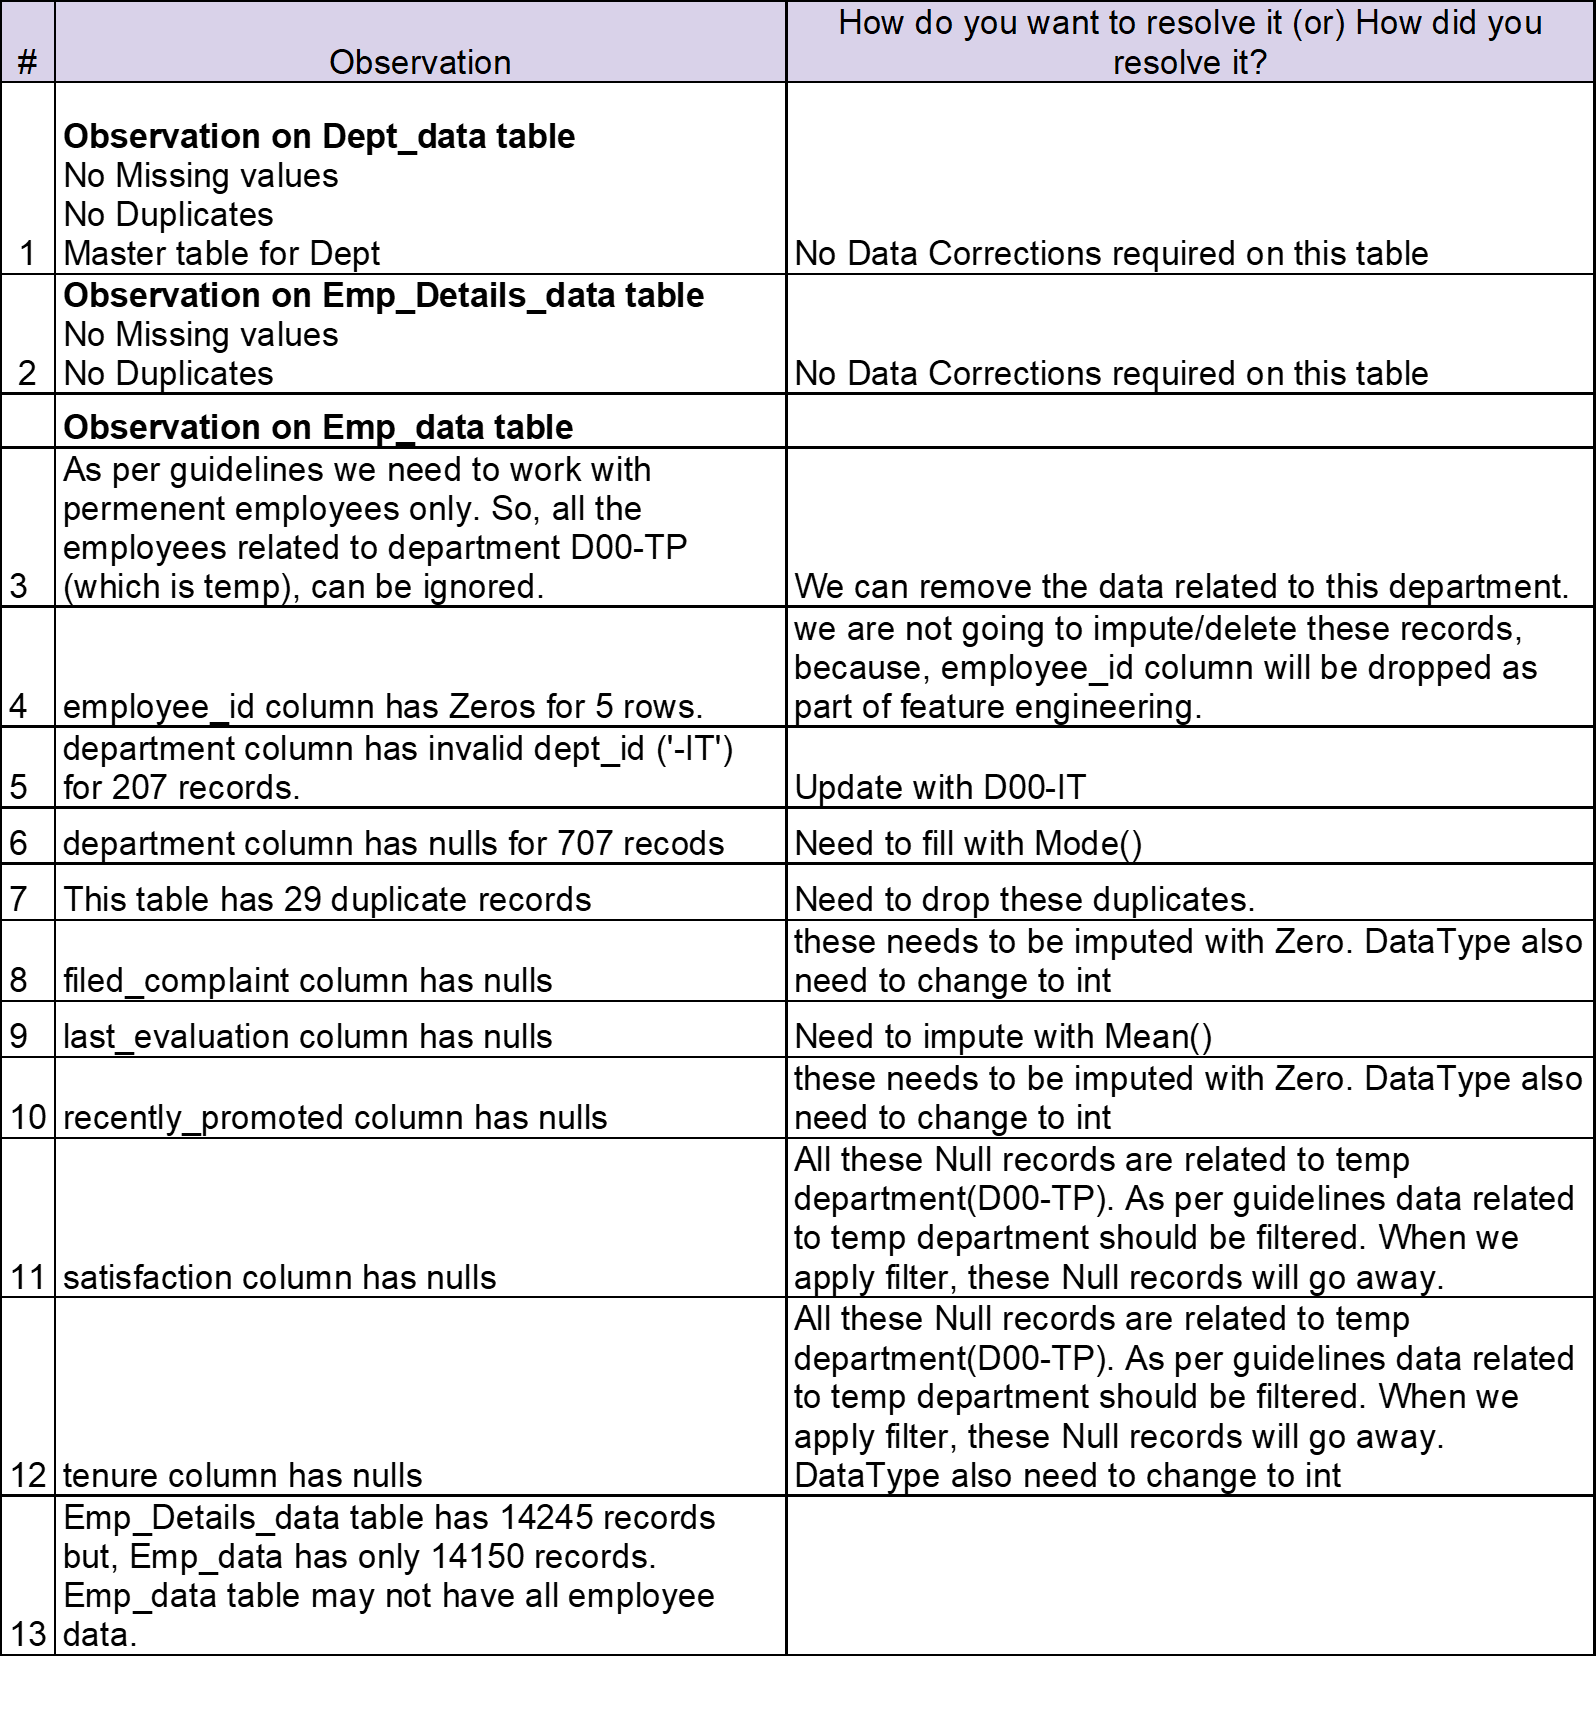

In [275]:
df.isnull().sum()

employee_id              0
age                      0
gender                   0
marital_status           0
department             913
salary                   0
tenure                 150
recently_promoted    13848
n_projects           14145
avg_monthly_hrs          0
satisfaction           150
last_evaluation       1487
filed_complaint      12099
dept_id                913
dept_name              913
dept_head              913
dtype: int64


### 4.2 Pandas Profiling after Data Preprocessing

Here, we will perform Pandas Profiling after preprocessing our dataset, so we will name the output file as profiling_after_preprocessing.html.

In [276]:
import pandas as pd
import pandas_profiling
from pandas_profiling import ProfileReport 

In [279]:
import pandas as pd
pd.__version__

'1.3.5'

In [282]:
!pip install pandas==1.4.2

ERROR: Could not find a version that satisfies the requirement pandas==1.4.2 (from versions: 0.1, 0.2, 0.3.0, 0.4.0, 0.4.1, 0.4.2, 0.4.3, 0.5.0, 0.6.0, 0.6.1, 0.7.0, 0.7.1, 0.7.2, 0.7.3, 0.8.0, 0.8.1, 0.9.0, 0.9.1, 0.10.0, 0.10.1, 0.11.0, 0.12.0, 0.13.0, 0.13.1, 0.14.0, 0.14.1, 0.15.0, 0.15.1, 0.15.2, 0.16.0, 0.16.1, 0.16.2, 0.17.0, 0.17.1, 0.18.0, 0.18.1, 0.19.0, 0.19.1, 0.19.2, 0.20.0, 0.20.1, 0.20.2, 0.20.3, 0.21.0, 0.21.1, 0.22.0, 0.23.0, 0.23.1, 0.23.2, 0.23.3, 0.23.4, 0.24.0, 0.24.1, 0.24.2, 0.25.0, 0.25.1, 0.25.2, 0.25.3, 1.0.0, 1.0.1, 1.0.2, 1.0.3, 1.0.4, 1.0.5, 1.1.0, 1.1.1, 1.1.2, 1.1.3, 1.1.4, 1.1.5, 1.2.0, 1.2.1, 1.2.2, 1.2.3, 1.2.4, 1.2.5, 1.3.0, 1.3.1, 1.3.2, 1.3.3, 1.3.4, 1.3.5)
ERROR: No matching distribution found for pandas==1.4.2


In [283]:
import pandas as pd
import pandas_profiling
from pandas_profiling import ProfileReport 

In [281]:
!pip3 install

ERROR: You must give at least one requirement to install (see "pip help install")


In [290]:
!pip install pandas-profiling==2.7.1

     |████████████████████████████████| 252 kB 5.2 MB/s 
     |████████████████████████████████| 58 kB 5.1 MB/s 
  Attempting uninstall: visions
    Found existing installation: visions 0.7.4
    Uninstalling visions-0.7.4:
      Successfully uninstalled visions-0.7.4
  Attempting uninstall: pandas-profiling
    Found existing installation: pandas-profiling 3.1.1
    Uninstalling pandas-profiling-3.1.1:
      Successfully uninstalled pandas-profiling-3.1.1


In [292]:
! pip install https://github.com/pandas-profiling/pandas-profiling/archive/master.zip

  Using cached https://github.com/pandas-profiling/pandas-profiling/archive/master.zip
  Using cached visions-0.7.4-py3-none-any.whl (102 kB)
  Created wheel for pandas-profiling: filename=pandas_profiling-3.1.1-py2.py3-none-any.whl size=261287 sha256=8a6bdc522f0ebceda482c003bc17680cde87ee781aa42dfa875d58123254de87
  Stored in directory: /tmp/pip-ephem-wheel-cache-rrf2c57q/wheels/cc/d5/09/083fb07c9363a2f45854b0e3a7de7d7c560f07da74b9e9769d
Successfully built pandas-profiling
  Attempting uninstall: visions
    Found existing installation: visions 0.4.1
    Uninstalling visions-0.4.1:
      Successfully uninstalled visions-0.4.1
  Attempting uninstall: pandas-profiling
    Found existing installation: pandas-profiling 2.7.1
    Uninstalling pandas-profiling-2.7.1:
      Successfully uninstalled pandas-profiling-2.7.1


In [297]:
import pandas as pd
import numpy as np
from pandas_profiling import ProfileReport
 
#profile = ProfileReport(df)
#profile.to_notebook_iframe()

In [298]:
#profile = ProfileReport(df, title="Pandas Profiling Report")



In [299]:
#profile = ProfileReport(df, title="data", html={'style' : {'full_width':True}})
#profile.to_file(output_file="name of html file.html") 

In [285]:
from pandas_profiling import ProfileReport
#from pandas_profiling.utils.cache import cache_file


In [260]:
import pandas as pd

from pandas_profiling import ProfileReport

# Generate the profile report
#ieee_fraud_report = ProfileReport(df, minimal=True)

In [296]:
#profile = ProfileReport(df,title= 'Employee Attrition Data Profiling', html = {'style' : {'full_width' : True}})

In [303]:
report = df.profile_report(
   sort=None, html={"style": {"full_width": True}}, progress_bar=False
)report

SyntaxError: ignored

In [ ]:
#profile_report = df_merge_emp_data.profile_report(html={"style": {"full_width": True}})
#profile_report.to_file("/data/example.html")

In [ ]:
#profile_report = df.profile_report(
#    explorative=True, html={"style": {"full_width": True}}
#)
#profile_report

In [ ]:
#

<a id=section5></a>
## 5. Exploratory Data Analysis

**Exploratory Data Analysis(EDA)** is an **approach to analyzing data sets** to **summarize** their **main characteristics**, often with **visual methods**. 


- It includes **cleaning, munging, combining, reshaping, slicing, dicing, and transforming data** for **analysis** purpose.


- The **primary goal of EDA** is to **maximize the analyst's insight into a data set** and into the **underlying structure of a data set**, while **providing all of the specific items** that an **analyst would want to extract from a data set**, such as:
 <br><br> 
  - A list of **outliers**.<br><br>
  
  - A **good-fitting model**.  <br><br>
  
  - **Estimates for parameters**.<br><br>
  
  - **Uncertainties** for those **estimates**.<br><br>
  
  - A **ranked list** of **important factors**.<br><br>
  
  - **Conclusions** as to whether **individual factors are statistically significant**.<br><br>
  
  - A **sense of robustness of conclusions**.<br><br>
  
  - **Optimal settings**.<br><br>

**As per guidelines we need to work with permenent employees only. So, all the employees related to department D00-TP (which is temp), can be ignored.**

- We can remove the data related to this department.

In [ ]:
df.shape

(14145, 16)

In [ ]:
df[df.department != "D00-TP"]

,employee_id,age,gender,marital_status,department,salary,tenure,recently_promoted,n_projects,avg_monthly_hrs,satisfaction,last_evaluation,filed_complaint,dept_id,dept_name,dept_head
0,113558,43,Male,Married,D00-PR,medium,4,1.0,NaN,111,0.921208,0.753977,NaN,D00-PR,Procurement,Louie Viles
1,108071,36,Male,Married,D00-PR,medium,6,NaN,NaN,151,0.210300,0.608282,NaN,D00-PR,Procurement,Louie Viles
2,110888,42,Male,Married,D00-PR,medium,3,NaN,NaN,152,0.720369,0.673508,NaN,D00-PR,Procurement,Louie Viles
3,115694,26,Male,Unmarried,D00-PR,medium,4,NaN,NaN,167,0.575996,0.874656,NaN,D00-PR,Procurement,Louie Viles
4,107767,43,Male,Married,D00-PR,medium,5,NaN,NaN,174,0.208138,0.634783,1.0,D00-PR,Procurement,Louie Viles
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
14140,128142,22,Female,Unmarried,D00-FN,medium,3,NaN,NaN,153,0.423452,0.510412,NaN,D00-FN,Finance,Aanchal J
14141,112268,29,Male,Unmarried,D00-FN,high,2,NaN,NaN,235,0.928861,0.735850,1.0,D00-FN,Finance,Aanchal J
14142,112048,54,Male,Married,D00-FN,medium,5,NaN,NaN,117,0.145967,0.766361,NaN,D00-FN,Finance,Aanchal J
14143,112337,52,Male,Married,D00-FN,low,3,NaN,NaN,193,0.695128,0.990808,NaN,D00-FN,Finance,Aanchal J


In [ ]:
df.shape

(14145, 16)

In [ ]:
df[df.department == 'D00-TP'].count()

employee_id          150
age                  150
gender               150
marital_status       150
department           150
salary               150
tenure               150
recently_promoted      0
n_projects             0
avg_monthly_hrs      150
satisfaction           0
last_evaluation        0
filed_complaint       29
dept_id              150
dept_name            150
dept_head            150
dtype: int64

In [ ]:
df=df [df.department !='D00-TP']

In [ ]:
df.shape

(13995, 16)

In [ ]:
df.head(2)

,employee_id,age,gender,marital_status,department,salary,tenure,recently_promoted,n_projects,avg_monthly_hrs,satisfaction,last_evaluation,filed_complaint,dept_id,dept_name,dept_head
0,113558,43,Male,Married,D00-PR,medium,4,1.0,NaN,111,0.921208,0.753977,NaN,D00-PR,Procurement,Louie Viles
1,108071,36,Male,Married,D00-PR,medium,6,NaN,NaN,151,0.210300,0.608282,NaN,D00-PR,Procurement,Louie Viles


In [ ]:
df[df.dept_id == 'D00-TP'].count()

employee_id          0
age                  0
gender               0
marital_status       0
department           0
salary               0
tenure               0
recently_promoted    0
n_projects           0
avg_monthly_hrs      0
satisfaction         0
last_evaluation      0
filed_complaint      0
dept_id              0
dept_name            0
dept_head            0
dtype: int64

In [ ]:
df[df.department == 'D00-TP'].count()

employee_id          0
age                  0
gender               0
marital_status       0
department           0
salary               0
tenure               0
recently_promoted    0
n_projects           0
avg_monthly_hrs      0
satisfaction         0
last_evaluation      0
filed_complaint      0
dept_id              0
dept_name            0
dept_head            0
dtype: int64

In [ ]:
df.groupby(['department']).size()

department
D00-AD      175
D00-ENG    2573
D00-FN      725
D00-IT     1157
D00-MN      593
D00-MT      815
D00-PD      855
D00-PR      173
D00-SP     2112
D00-SS     3904
dtype: int64

In [ ]:
df.groupby(['dept_id']).size()

dept_id
D00-AD      175
D00-ENG    2573
D00-FN      725
D00-IT     1157
D00-MN      593
D00-MT      815
D00-PD      855
D00-PR      173
D00-SP     2112
D00-SS     3904
dtype: int64

In [ ]:
df['dept_id'].isnull().sum()  # 913 null
#df['department'].isnull().sum()  # 913 null

913

In [ ]:
df['department'] = df['department'].fillna(df['department'].mode()[0])


In [ ]:
df['department'].isnull().sum()  # 0 null

0

In [ ]:
df['dept_id'].isnull().sum()  # 913 null

913

In [ ]:
df['dept_id'] = df['dept_id'].fillna(df['dept_id'].mode()[0])


In [ ]:
df['dept_id'].isnull().sum()  # 0null

0

# DUplicate

In [ ]:
# occurrence based on all columns
df[df.duplicated()]
 
#print("Duplicate Rows :")
 


,employee_id,age,gender,marital_status,department,salary,tenure,recently_promoted,n_projects,avg_monthly_hrs,satisfaction,last_evaluation,filed_complaint,dept_id,dept_name,dept_head
312,109425,24,Male,Unmarried,D00-MN,high,10,NaN,NaN,148,0.481001,0.577112,NaN,D00-MN,Management,Ellie Trafton
319,112373,29,Male,Unmarried,D00-MN,low,10,NaN,NaN,265,0.545978,0.825672,1.0,D00-MN,Management,Ellie Trafton
340,119780,25,Male,Unmarried,D00-MN,medium,3,NaN,NaN,175,0.934465,0.854538,NaN,D00-MN,Management,Ellie Trafton
791,112203,45,Male,Married,D00-SS,medium,5,NaN,NaN,206,0.783548,1.000000,NaN,D00-SS,Sales,Edward J Bayley
1030,116153,22,Female,Unmarried,D00-SS,medium,3,NaN,NaN,192,0.539834,0.951901,NaN,D00-SS,Sales,Edward J Bayley
1542,122385,24,Female,Unmarried,D00-SS,low,3,NaN,NaN,161,0.416761,0.483513,NaN,D00-SS,Sales,Edward J Bayley
1736,102701,22,Female,Unmarried,D00-SS,medium,5,NaN,NaN,133,0.617304,0.986741,NaN,D00-SS,Sales,Edward J Bayley
2242,101809,45,Female,Married,D00-SS,medium,5,NaN,NaN,245,0.225084,0.850785,NaN,D00-SS,Sales,Edward J Bayley
2250,108265,25,Male,Unmarried,D00-SS,medium,2,NaN,NaN,238,0.624658,0.958633,NaN,D00-SS,Sales,Edward J Bayley
3755,104360,30,Male,Married,D00-SS,high,3,NaN,NaN,136,0.664039,0.645563,NaN,D00-SS,Sales,Edward J Bayley


In [ ]:
# Print the
df[df.duplicated()].count()

employee_id          29
age                  29
gender               29
marital_status       29
department           29
salary               29
tenure               29
recently_promoted     0
n_projects            0
avg_monthly_hrs      29
satisfaction         29
last_evaluation      29
filed_complaint       5
dept_id              29
dept_name            29
dept_head            29
dtype: int64

In [ ]:
df.shape

In [ ]:
df.duplicated()

In [ ]:
#df_actual.drop_duplicates((subset=['employee_id']))

df=df.drop_duplicates(subset=['employee_id'],keep='last')

In [ ]:
df[df.duplicated()].count()

employee_id          0
age                  0
gender               0
marital_status       0
department           0
salary               0
tenure               0
recently_promoted    0
n_projects           0
avg_monthly_hrs      0
satisfaction         0
last_evaluation      0
filed_complaint      0
dept_id              0
dept_name            0
dept_head            0
dtype: int64

In [ ]:
df.shape

(13966, 16)

In [ ]:
df.head(3)

,employee_id,age,gender,marital_status,department,salary,tenure,recently_promoted,n_projects,avg_monthly_hrs,satisfaction,last_evaluation,filed_complaint,dept_id,dept_name,dept_head
0,113558,43,Male,Married,D00-PR,medium,4,1.0,NaN,111,0.921208,0.753977,0.0,D00-PR,Procurement,Louie Viles
1,108071,36,Male,Married,D00-PR,medium,6,0.0,NaN,151,0.210300,0.608282,0.0,D00-PR,Procurement,Louie Viles
2,110888,42,Male,Married,D00-PR,medium,3,0.0,NaN,152,0.720369,0.673508,0.0,D00-PR,Procurement,Louie Viles


In [ ]:
df['filed_complaint'].isnull().sum()

11954

In [ ]:
df['filed_complaint'] = df['filed_complaint'].fillna(0)

In [ ]:
#df['n_projects'] = df['n_projects'].fillna('0')

In [ ]:
#df = df.drop(columns=["n_projects"])

In [ ]:
#df['n_projects'] = df['n_projects'].fillna(0) n_projects
#df.drop(['n_projects'],1, inplace=True)

In [ ]:
df['filed_complaint'].isnull().sum()

0

In [ ]:
df['recently_promoted'].isnull().sum()

13669

In [ ]:
df['recently_promoted'] = df['recently_promoted'].fillna(0)

In [ ]:
df['recently_promoted'].isnull().sum()

0

In [ ]:
df['tenure'].isnull().sum() #13966

0

In [ ]:
 df['tenure'].fillna((df['tenure'].mean()),inplace=True)



In [ ]:
df['dept_name'].isnull().sum()

913

In [ ]:
df.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 13966 entries, 0 to 14144
Data columns (total 16 columns):
 #   Column             Non-Null Count  Dtype  
---  ------             --------------  -----  
 0   employee_id        13966 non-null  int64  
 1   age                13966 non-null  int64  
 2   gender             13966 non-null  object 
 3   marital_status     13966 non-null  object 
 4   department         13966 non-null  object 
 5   salary             13966 non-null  object 
 6   tenure             13966 non-null  int64  
 7   recently_promoted  13966 non-null  float64
 8   n_projects         0 non-null      float64
 9   avg_monthly_hrs    13966 non-null  int64  
 10  satisfaction       13966 non-null  float64
 11  last_evaluation    12629 non-null  float64
 12  filed_complaint    13966 non-null  float64
 13  dept_id            13966 non-null  object 
 14  dept_name          13053 non-null  object 
 15  dept_head          13053 non-null  object 
dtypes: float64(5), int64(4

In [ ]:
df['dept_name'] = df['dept_name'].fillna(0)

In [ ]:
df['dept_name'].isnull().sum()

0

In [ ]:
df['satisfaction'].isnull().sum()

0

In [ ]:
#df['n_projects'].isnull().

In [ ]:
df.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 13966 entries, 0 to 14144
Data columns (total 16 columns):
 #   Column             Non-Null Count  Dtype  
---  ------             --------------  -----  
 0   employee_id        13966 non-null  int64  
 1   age                13966 non-null  int64  
 2   gender             13966 non-null  object 
 3   marital_status     13966 non-null  object 
 4   department         13966 non-null  object 
 5   salary             13966 non-null  object 
 6   tenure             13966 non-null  int64  
 7   recently_promoted  13966 non-null  float64
 8   n_projects         0 non-null      float64
 9   avg_monthly_hrs    13966 non-null  int64  
 10  satisfaction       13966 non-null  float64
 11  last_evaluation    12629 non-null  float64
 12  filed_complaint    13966 non-null  float64
 13  dept_id            13966 non-null  object 
 14  dept_name          13966 non-null  object 
 15  dept_head          13053 non-null  object 
dtypes: float64(5), int64(4

In [ ]:
#df_merge[['tenure']] = df_merge['tenure'].apply(pd.to_numeric)
print(df_merge.dtypes)

In [ ]:
df['dept_name'].value_counts()

dept_name      4808
Engineering    2573
Support        2108
IT             1152
Product         853
Marketing       812
Finance         722
Management      590
Admin           175
Procurement     173
Name: dept_name, dtype: int64

In [ ]:
df['satisfaction'].value_counts()
       

1.000000    356
0.366453      2
0.938705      2
0.894093      2
0.645717      2
           ... 
0.891392      1
0.529100      1
0.888514      1
0.613921      1
0.105267      1
Name: satisfaction, Length: 13492, dtype: int64

In [ ]:
df['recently_promoted'].value_counts()
  

0.0    13669
1.0      297
Name: recently_promoted, dtype: int64

In [ ]:
df['marital_status'].value_counts()

Unmarried    7062
Married      6904
Name: marital_status, dtype: int64

In [ ]:
dff=df

In [ ]:
dff['dept_name'].value_counts()

Sales          4808
Engineering    2573
Support        2108
IT             1152
Product         853
Marketing       812
Finance         722
Management      590
Admin           175
Procurement     173
Name: dept_name, dtype: int64

In [ ]:
df.loc[dff.dept_id == 'D00-SS', ['dept_name']] = 'Sales'


In [ ]:
df['dept_name'] = np.where(df['dept_id'] == 2, 10,20)


In [ ]:
df['dept_id'].value_counts()

D00-SS     4808
D00-ENG    2573
D00-SP     2108
D00-IT     1152
D00-PD      853
D00-MT      812
D00-FN      722
D00-MN      590
D00-AD      175
D00-PR      173
Name: dept_id, dtype: int64

In [ ]:
df['department'].value_counts()

D00-SS     4808
D00-ENG    2573
D00-SP     2108
D00-IT     1152
D00-PD      853
D00-MT      812
D00-FN      722
D00-MN      590
D00-AD      175
D00-PR      173
Name: department, dtype: int64

In [ ]:
df['salary'].value_counts()

low       6825
medium    6009
high      1132
Name: salary, dtype: int64

Text(0.5, 1.0, 'Pie chart showing the proportion of Salary in Attrition')

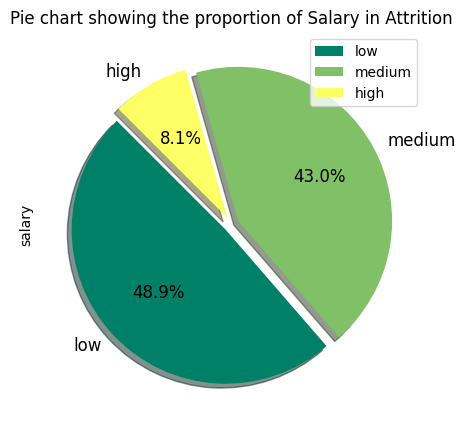

In [ ]:
df['salary'].value_counts().plot(kind='pie', explode=[0.05,0.05,0.05], fontsize=12, autopct='%3.1f%%', 
                                               figsize=(5,5), shadow=True, startangle=135, legend=True, cmap='summer')

plt.ylabel('salary')
plt.title('Pie chart showing the proportion of Salary in Attrition')

Text(0.5, 1.0, 'Pie chart showing the proportion of Salary in Attrition')

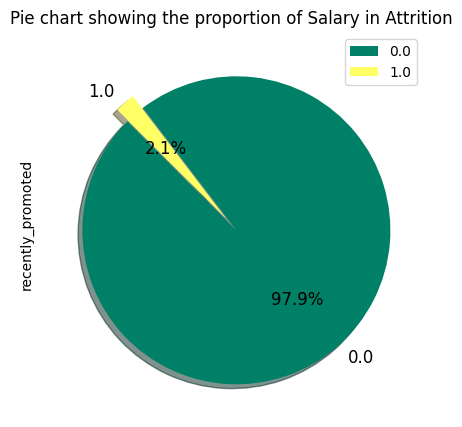

In [ ]:
df['recently_promoted'].value_counts().plot(kind='pie', explode=[0.05,0.05], fontsize=12, autopct='%3.1f%%', 
                                               figsize=(5,5), shadow=True, startangle=135, legend=True, cmap='summer')

plt.ylabel('recently_promoted')
plt.title('Pie chart showing the proportion of Salary in Attrition')

Text(0.5, 1.0, 'Pie chart showing the proportion of marital_status in Attrition')

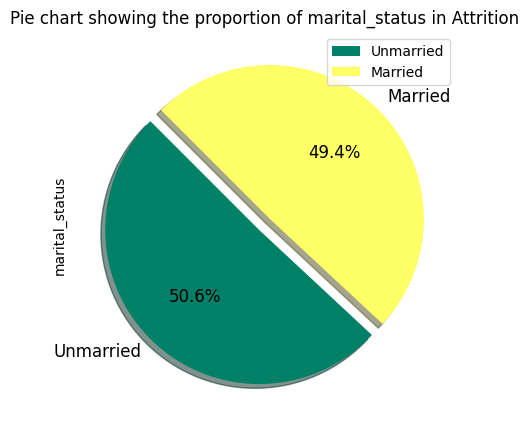

In [ ]:
df['marital_status'].value_counts().plot(kind='pie', explode=[0.05,0.05], fontsize=12, autopct='%3.1f%%', 
                                               figsize=(5,5), shadow=True, startangle=135, legend=True, cmap='summer')

plt.ylabel('marital_status')
plt.title('Pie chart showing the proportion of marital_status in Attrition')

Text(0.5, 1.0, 'Pie chart showing the proportion of dept_name in Attrition')

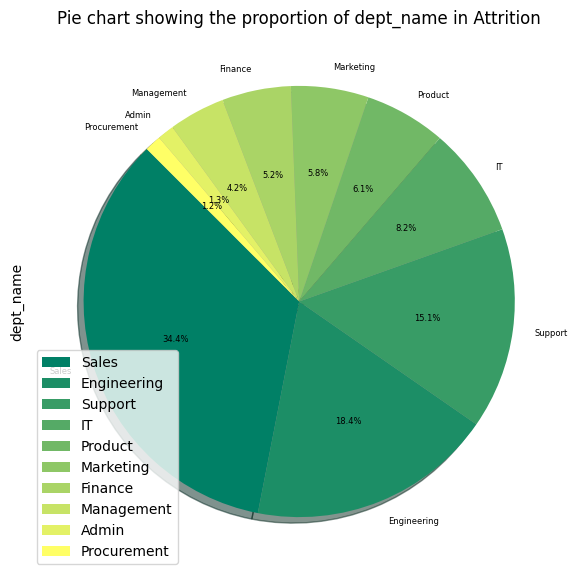

In [ ]:
df['dept_name'].value_counts().plot(kind='pie',  fontsize=6, autopct='%3.1f%%', 
                                               figsize=(7,7), shadow=True, startangle=135, legend=True, cmap='summer')

plt.ylabel('dept_name')
plt.title('Pie chart showing the proportion of dept_name in Attrition')

Text(0.5, 1.0, 'Attrition by Department')

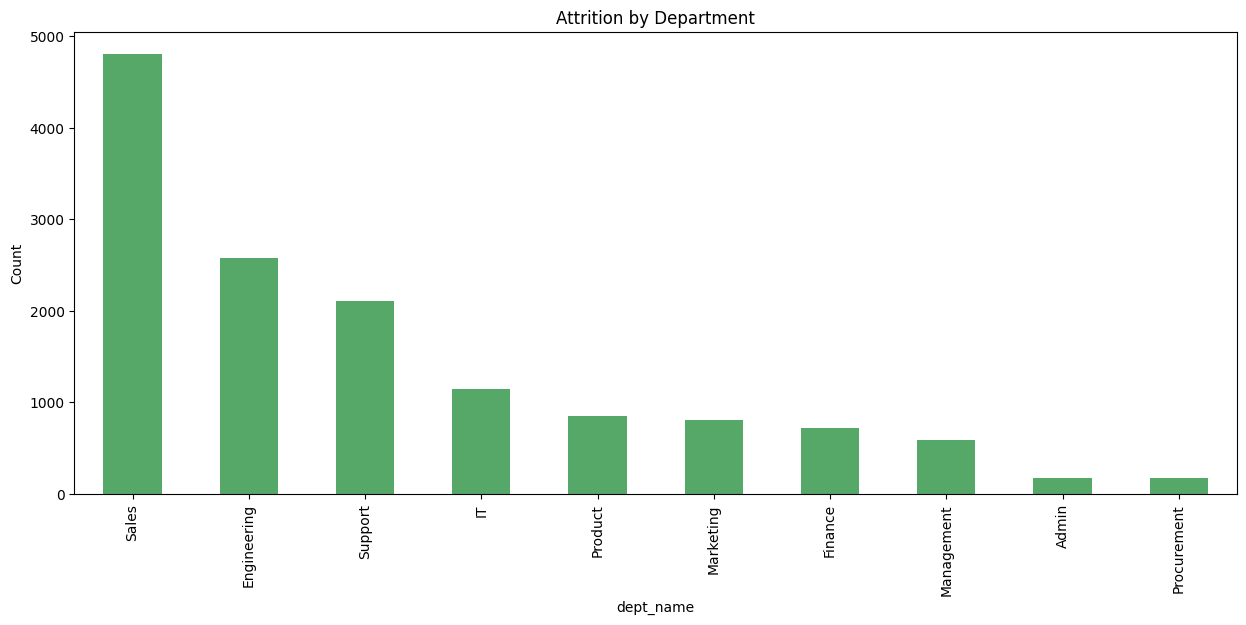

In [ ]:
plt.figure(figsize = (15, 6))
df.groupby('dept_name')['employee_id'].count().sort_values(ascending=False).plot(kind='bar', color='g')
plt.ylabel('Count')
plt.title('Attrition by Department')

Text(0.5, 1.0, 'Attrition by Department')

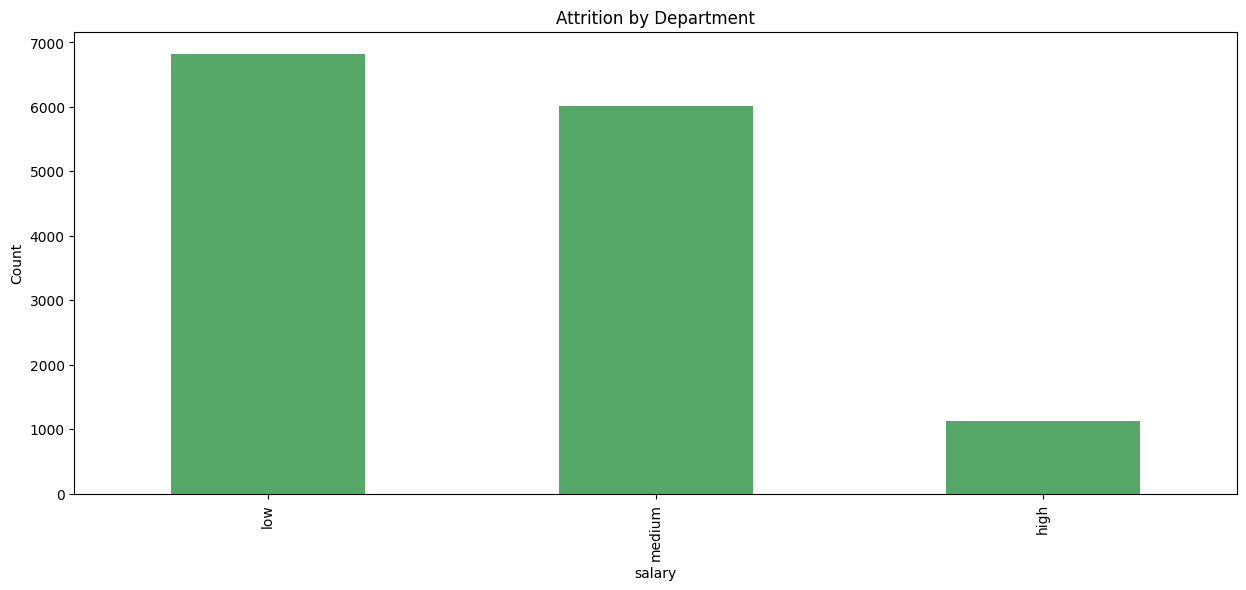

In [ ]:
plt.figure(figsize = (15, 6))
df.groupby('salary')['employee_id'].count().sort_values(ascending=False).plot(kind='bar', color='g')
plt.ylabel('Count')
plt.title('Attrition by Department')

Text(0.5, 1.0, 'Department Vs Tenure ')

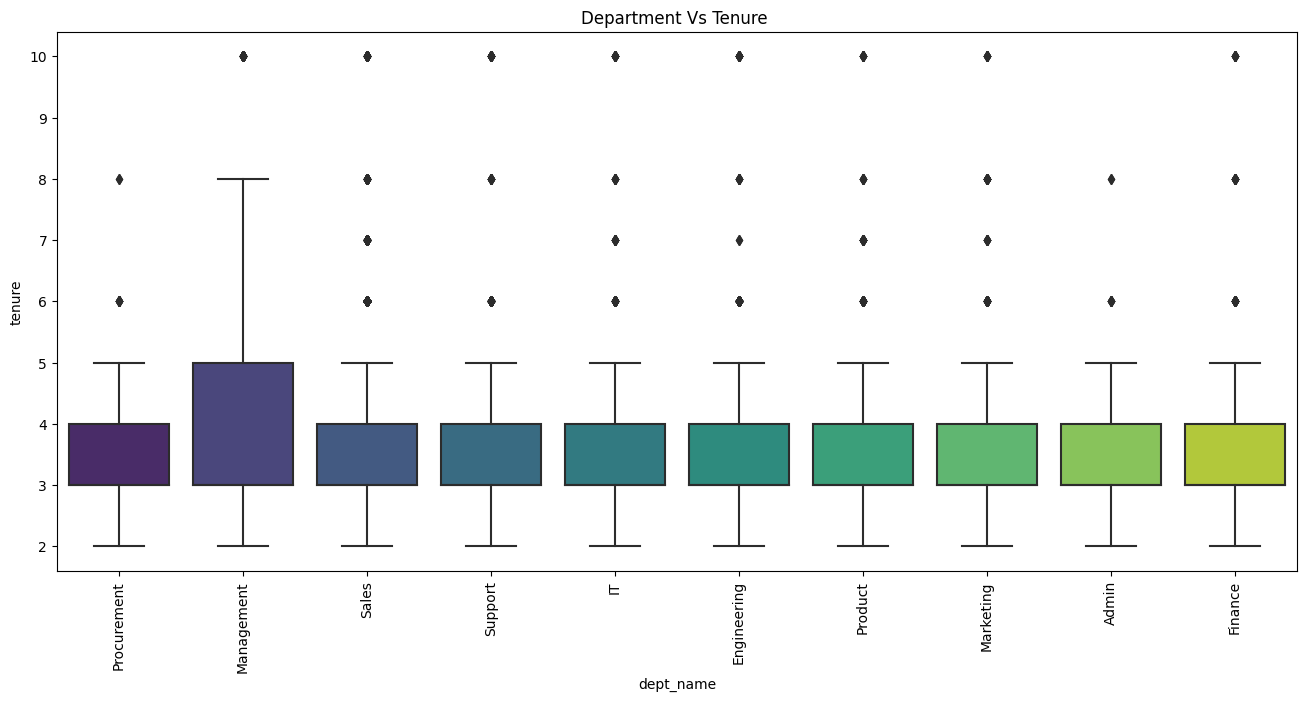

In [ ]:
plt.figure(figsize=(16, 7))
sns.boxplot(data=df, x='dept_name', y='tenure', palette='viridis', width=0.8)
plt.xticks(rotation=90)
plt.title('Department Vs Tenure ')

Text(0.5, 1.0, 'Salary Vs Tenure ')

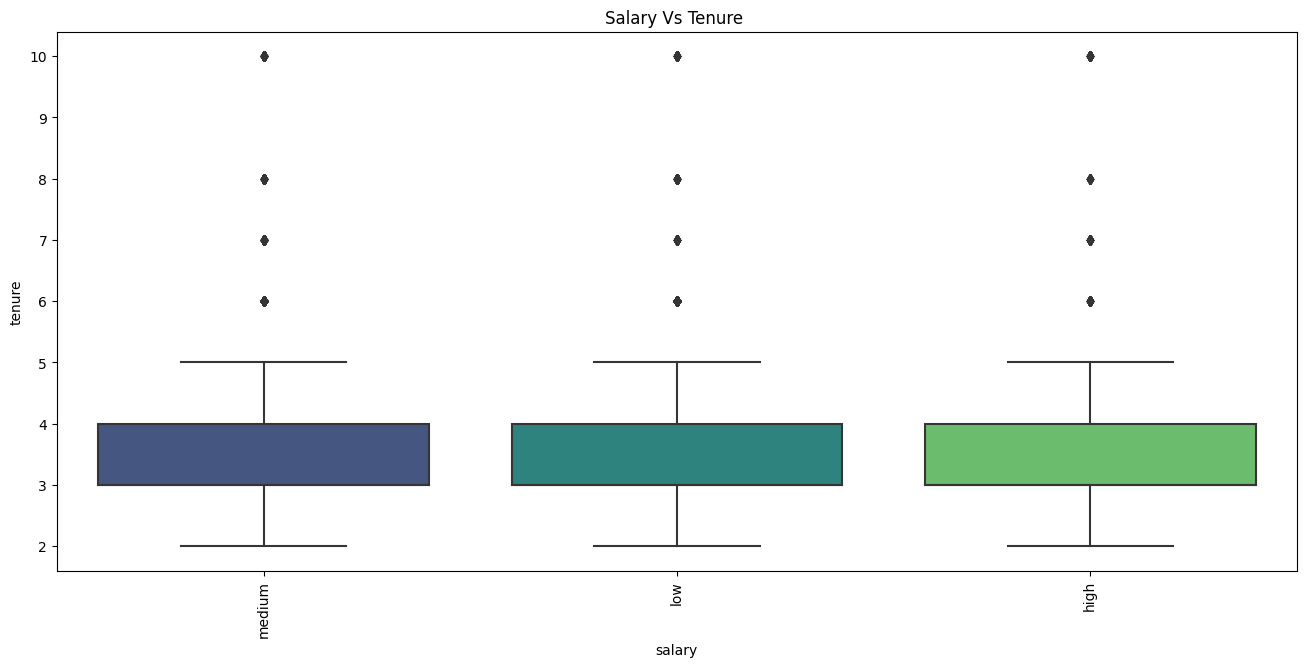

In [ ]:
plt.figure(figsize=(16, 7))
sns.boxplot(data=df, x='salary', y='tenure', palette='viridis', width=0.8)
plt.xticks(rotation=90)
plt.title('Salary Vs Tenure ')

** OBSERVATION

1. 48.9% employee leaving organization are on low salary
2. 43% employee leaving organization are on medium salary
3. Only 8.1% emloyees leaving on high salary 
4. 97.9% employees leaving have not been promoted recently
5. 34.4% employees leaving are from Sales Dept, followed by 
engineering 18.4% and support by 15.1% followed by IT 8%


In [263]:
%load_ext autoreload
%autoreload 2


The autoreload extension is already loaded. To reload it, use:
  %reload_ext autoreload


In [264]:
import sys

!{sys.executable} -m pip install -U pandas-profiling[notebook]
!jupyter nbextension enable --py widgetsnbextension

Enabling notebook extension jupyter-js-widgets/extension...
Paths used for configuration of notebook: 
    	/root/.jupyter/nbconfig/notebook.json
      - Validating: OK
Paths used for configuration of notebook: 
    	/root/.jupyter/nbconfig/notebook.json


In [267]:
from pathlib import Path

import numpy as np
import pandas as pd
import requests

import pandas_profiling
from pandas_profiling.utils.cache import cache_file

In [268]:
! pip install https://github.com/pandas-profiling/pandas-profiling/archive/master.zip
profile.to_notebook_iframe()

  Using cached https://github.com/pandas-profiling/pandas-profiling/archive/master.zip


NameError: ignored

In [269]:
! pip install pandas-profiling[notebook]


In [270]:
import numpy as np
import pandas as pd
from pandas_profiling import ProfileReport

In [271]:
profile = df.profile_report(
    title="Pandas Profiling Report", plot={"histogram": {"bins": 8}}
)
profile.to_file("output.html")

AttributeError: ignored

In [272]:
profile = ProfileReport(df, title="Pandas Profiling Report")


OSError: ignored

In [273]:
#profile_report = df.profile_report(html={"style": {"full_width": True}})
#profile_report.to_file("/tmp/example.html")
profile_report = df.p 
(html={"style": {"full_width": True}})


SyntaxError: ignored

In [ ]:
profile_report = df.profile_report(
    explorative=True, html={"style": {"full_width": True}}
)
profile_report

AttributeError: ignored